In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from pandas import datetime
from sklearn.preprocessing import MinMaxScaler

In [8]:
# read data and visualization
bread_sales = pd.read_csv("costco_747b.csv", usecols=[1,2])
bread_sales_599 = bread_sales[bread_sales.AVG_UNIT_PRICE==5.99]  # only keep items price = $5.99
bread_sales_599 = bread_sales_599.ix[:,0]
plt.figure(figsize=(20,10))
plt.plot(bread_sales)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(bread_sales_599)  
plt.show()

FileNotFoundError: File b'costco_747b.csv' does not exist

In [28]:
np.random.seed(7)

In [29]:
X = bread_sales_599.values
X = X.astype('float32')

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

/Users/i025497/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/i025497/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [31]:
train, test = X[0:-30],X[-30:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)   

In [32]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
trainX = np.reshape(trainX,(trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [35]:
model = Sequential()
model.add(LSTM(8,input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX,trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
12s - loss: 0.0061
Epoch 2/5
11s - loss: 0.0045
Epoch 3/5
11s - loss: 0.0044
Epoch 4/5
11s - loss: 0.0044
Epoch 5/5
11s - loss: 0.0044


In [36]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [37]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [38]:
trainScore = np.mean(abs((trainY[0]-trainPredict[:,0])/trainY[0]))
print('Train Score: %.3f MAPE' % (trainScore))

testScore = np.mean(abs((testY[0]-testPredict[:,0])/testY[0]))
print('Test Score: %.3f MAPE' % (testScore))

Train Score: 0.207 MAPE
Test Score: 0.136 MAPE


/Users/i025497/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


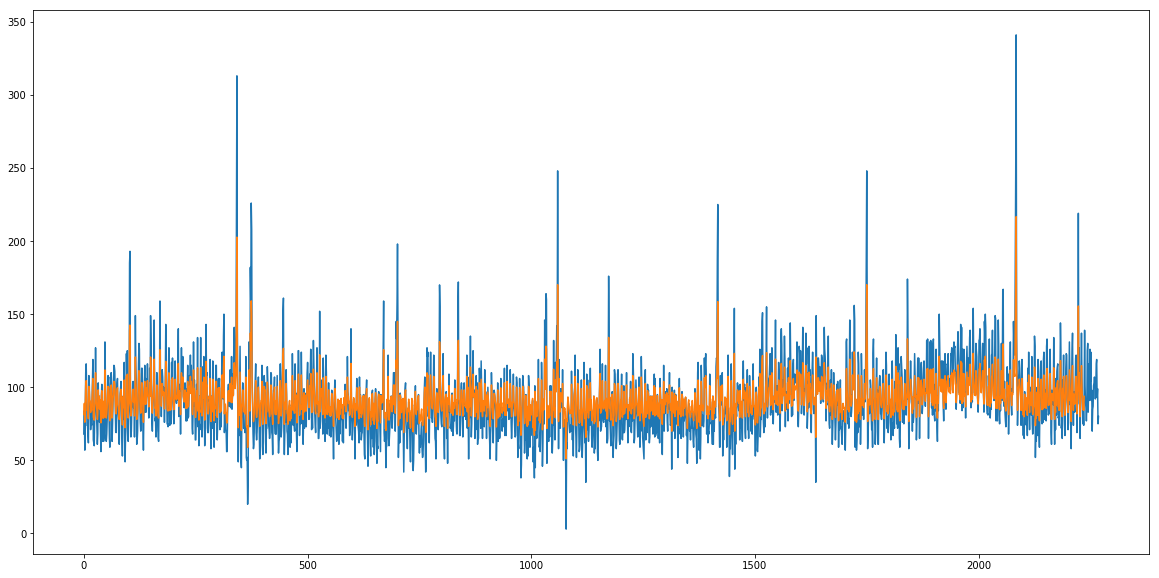

In [39]:

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredict)
testPredictPlot = np.empty_like(X)
testPredictPlot[len(trainPredict)+4:len(X)]=testPredict.reshape(28)
#plt.plot(testPredictPlot)

plt.show()

In [354]:
testPredict.reshape(647,1).shape

(647, 1)